In [1]:
library(Seurat)
library(SeuratDisk)
library(tidyverse)
library(RColorBrewer)
library(scales)
library(cowplot)
library(ggsci)

Attaching SeuratObject

Attaching sp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [38]:
library(ggpubr)
library(scales)


text_sizes <- theme(axis.text.x=element_text(size=5,colour="black"),
                      axis.text.y=element_text(size=5,colour="black"),
                      axis.title.y=element_text(size=7,colour="black", margin = margin(t = 2, l = 2, r = 2, b =2, unit = "pt")),
                      axis.title.x=element_text(size=7,colour="black", margin = margin(t = 2, l = 2, r = 2, b = 2, unit = "pt")),
                      legend.text = element_text(size=5,colour="black"),
                      legend.title = element_text(size=7,colour="black", margin = margin(t = 5, l = 0, r = 0, b = 5, unit = "pt")),
                      legend.key = element_rect(colour = "transparent", fill = "transparent"),
                      strip.text.x = element_text(size = 5,color = 'black',face="bold", angle=0),
                      strip.text.y = element_text(size=5,color = 'black', face="bold", angle=0, vjust=0.5, hjust=0),
                      axis.ticks= element_line(color = 'black', size=0.2),
                      axis.line = element_line(colour = "black", size = 0.2, linetype = "solid"),
                      plot.margin=unit(c(2,2,2,2),"pt"),
                      plot.title=element_text(size=7, face="bold", colour="black"))


common_minimal <- text_sizes + theme(
        plot.background = element_rect(fill = NA,colour = NA),
        strip.background = element_rect(fill = NA,colour = NA),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank()) + theme(
    legend.spacing = unit(5, 'pt'), 
    legend.key.size = unit(10, 'pt'))


# commonly used, x axis text 45 degree
common_0x <- common_minimal + theme(axis.text.x = element_text(size=5, angle=0))

In [5]:
one = read_csv('/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf/batch_metrics/cross_species/batch_metrics_header.csv')
two = read_csv('/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/batch_metrics/cross_species/batch_metrics_header.csv')
three =  read_csv('/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm_xl/batch_metrics/cross_species/batch_metrics_header.csv')
four = read_csv('/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm_xl_dr/batch_metrics/cross_species/batch_metrics_header.csv')

New names:
• `` -> `...1`
Rows: 24 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ...1, input_h5ad, unintegrated_h5ad, species_key, batch_key, cluste...
dbl (8): NMI_cluster/label, ARI_cluster/label, iLISI, cLISI, graph_conn, pcr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 27 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ...1, input_h5ad, unintegrated_h5ad, species_key, batch_key, cluste...
dbl (8): NMI_cluster/label, ARI_cluster/label, iLISI, cLISI, graph_conn, pcr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 24 Columns: 15
── Column specification ─────────────

In [6]:
head(one)
head(two)
head(three)
head(four)

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.8014646,0.6211628,2.220446e-16,1.0000000,0.9769688,0.8739172,0.6466970,0.7224401,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,fastMNN
value,0.8085508,0.6335394,6.661338e-16,1.0000000,0.9800662,0.8172526,0.6372714,0.7125162,metadata_nf_many_higher_expr_harmony_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,harmony
value,0.5833187,0.3939862,3.264335e-01,0.9946905,0.8730722,0.9493214,0.5329379,0.7923752,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,LIGER
value,0.7837252,0.6151238,6.661338e-16,1.0000000,0.8963997,0.6448593,0.6404224,0.6004346,metadata_nf_many_higher_expr_scanorama_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scanorama
value,0.7843277,0.6573818,4.184703e-02,0.9971844,0.9870543,0.9851136,0.5726005,0.8579209,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scVI
value,0.8488718,0.8464358,1.675403e-01,1.0000000,0.9744869,0.9047398,0.6771317,0.8286442,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,seuratCCA


...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.8032567,0.7157093,3.080208e-03,1.0000000,0.9117984,0.7439902,0.6470689,0.7755378,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,fastMNN
value,0.8267143,0.7393915,1.577180e-02,1.0000000,0.9114283,0.7615489,0.6422887,0.7760512,metadata_nf_many_higher_expr_harmony_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,harmony
value,0.5939153,0.6266316,3.847025e-01,0.9943179,0.5697591,0.9362925,0.4998089,0.6921461,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,LIGER
value,0.7545289,0.5707782,2.220446e-16,1.0000000,0.7981874,0.5763800,0.5983165,0.6594126,metadata_nf_many_higher_expr_scanorama_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scanorama
value,0.3309233,0.1872696,4.971804e-01,0.9444988,0.8607535,0.9769418,0.5608409,0.8215441,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scVI
value,0.8580277,0.8649991,1.633318e-01,0.9998744,0.9351485,0.8412813,0.6482314,0.8276025,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,seuratCCA


...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.7169908,0.5633963,3.401588e-03,0.9995750,0.8504286,0.6587097,0.5578733,0.8198417,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,fastMNN
value,0.7594181,0.6967710,2.890553e-02,0.9994989,0.8501949,0.8046938,0.5540149,0.8231794,metadata_nf_many_higher_expr_harmony_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,harmony
value,0.4007518,0.2525159,3.843392e-01,0.9663373,0.5330433,0.9479220,0.4284735,0.8079895,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,LIGER
value,0.6890440,0.4694291,1.480297e-16,0.9997844,0.7503856,0.5295296,0.4985670,0.6907832,metadata_nf_many_higher_expr_scanorama_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scanorama
value,0.3801045,0.1817242,2.874731e-01,0.9431260,0.9204086,0.9741849,0.5323835,0.8391718,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scVI
value,0.8030921,0.7730395,7.625692e-02,0.9994763,0.8728768,0.8782992,0.6030545,0.8386706,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,seuratCCA


...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.6589879,0.4758720,0.01124299,0.9989924,0.8125814,0.6189401,0.5130726,0.8465196,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,fastMNN
value,0.7064237,0.6514856,0.09682112,0.9972395,0.8011263,0.8649493,0.5249233,0.8810729,metadata_nf_many_higher_expr_harmony_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,harmony
value,0.3086102,0.2062680,0.40548511,0.9432710,0.5044869,0.9247037,0.4418452,0.8576884,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,LIGER
value,0.6329128,0.4136048,0.01054368,0.9985216,0.7664329,0.5497643,0.4810900,0.7346154,metadata_nf_many_higher_expr_scanorama_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scanorama
value,0.5824146,0.4534119,0.21608628,0.9618827,0.8769933,0.9689706,0.5202109,0.8597303,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scVI
value,0.7073057,0.6442544,0.11902084,0.9980526,0.8154709,0.8989694,0.5356623,0.8515466,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,seuratCCA


In [9]:
one$task = 'hs_mf'
two$task = 'hs_mf_mm'
three$task = 'hs_mf_mm_xl'
four$task = 'hs_mf_mm_xl_dr'

In [10]:
all = rbind(one, two, three, four)

In [15]:
all$avg_score = 0.25*(all$iLISI + all$pcr + all$silhouette_batch + all$graph_conn)

In [16]:
all

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method,task,avg_score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
value,0.8014646,0.6211628,2.220446e-16,1.0000000,0.9769688,0.8739172,0.6466970,0.7224401,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,fastMNN,hs_mf,0.6433315
value,0.8085508,0.6335394,6.661338e-16,1.0000000,0.9800662,0.8172526,0.6372714,0.7125162,metadata_nf_many_higher_expr_harmony_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,harmony,hs_mf,0.6274587
value,0.5833187,0.3939862,3.264335e-01,0.9946905,0.8730722,0.9493214,0.5329379,0.7923752,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,LIGER,hs_mf,0.7353006
value,0.7837252,0.6151238,6.661338e-16,1.0000000,0.8963997,0.6448593,0.6404224,0.6004346,metadata_nf_many_higher_expr_scanorama_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scanorama,hs_mf,0.5354234
value,0.7843277,0.6573818,4.184703e-02,0.9971844,0.9870543,0.9851136,0.5726005,0.8579209,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scVI,hs_mf,0.7179839
value,0.8488718,0.8464358,1.675403e-01,1.0000000,0.9744869,0.9047398,0.6771317,0.8286442,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,seuratCCA,hs_mf,0.7188528
value,0.7870518,0.6099822,4.440892e-16,1.0000000,0.9776018,0.8810592,0.6446096,0.7312615,metadata_nf_many_higher_expr_seuratRPCA_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,seuratRPCA,hs_mf,0.6474806
value,0.7955135,0.6110890,2.220446e-16,1.0000000,0.9756712,0.8690047,0.6481531,0.7198848,metadata_nf_many_higher_homology_conf_fastMNN_integrated.h5ad,metadata_nf_many_higher_homology_conf.h5ad,species,species,cell_ontology_mapped,fastMNN,hs_mf,0.6411402
value,0.8133309,0.6348845,6.661338e-16,1.0000000,0.9837578,0.8157452,0.6318578,0.7103901,metadata_nf_many_higher_homology_conf_harmony_integrated.h5ad,metadata_nf_many_higher_homology_conf.h5ad,species,species,cell_ontology_mapped,harmony,hs_mf,0.6274733


In [19]:
all[all == 'rligerUINMF'] = 'LIGER_UINMF'

In [20]:
all = all %>% mutate(homology_method = gsub("metadata_nf_|rliger_uinmf_metadata_", "", input_h5ad)) %>% 
mutate(homology_method = gsub("_fastMNN_integrated.h5ad|_harmony_integrated.h5ad|_LIGER_integrated.h5ad|_scVI_integrated.h5ad|_scanorama_integrated.h5ad|_rligerUINMF_integrated.h5ad|_seuratCCA_integrated.h5ad|_seuratRPCA_integrated.h5ad|_SAMap_integrated.h5ad", "", homology_method)) %>%
arrange(desc(pcr))  %>% 
mutate(homology_method = gsub("one2one_only|one2one", "one2one only", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_expr", "higher expression", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_homology_conf", "stronger homology", homology_method)) %>% 
mutate(homology_method = gsub("full", "all genes", homology_method)) %>% 
mutate(homology_method = factor(homology_method, levels = c("one2one only", 'higher expression', 'stronger homology', 'all genes'))) %>% 
mutate(homology_method = as.character(homology_method))

In [22]:
all = all %>% filter(integration_method != 'SAMap')

In [23]:
head(all)

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method,task,avg_score,homology_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
value,0.8364865,0.8366367,0.15785038,0.9985558,0.9883792,0.9894606,0.5729154,0.8533931,metadata_nf_many_higher_homology_conf_scVI_integrated.h5ad,metadata_nf_many_higher_homology_conf.h5ad,species,species,cell_ontology_mapped,scVI,hs_mf,0.7472708,stronger homology
value,0.5314671,0.5202602,0.53726256,0.9539685,0.9456959,0.9892234,0.5652609,0.8483463,metadata_nf_one2one_only_scVI_integrated.h5ad,metadata_nf_one2one_only.h5ad,species,species,cell_ontology_mapped,scVI,hs_mf,0.8301320,one2one only
value,0.7843277,0.6573818,0.04184703,0.9971844,0.9870543,0.9851136,0.5726005,0.8579209,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scVI,hs_mf,0.7179839,higher expression
value,0.6407075,0.6230579,0.14733603,0.9916804,0.9373082,0.9801308,0.5577949,0.7990565,metadata_nf_many_higher_homology_conf_scVI_integrated.h5ad,metadata_nf_many_higher_homology_conf.h5ad,species,species,cell_ontology_mapped,scVI,hs_mf_mm,0.7159579,stronger homology
value,0.7549424,0.6889677,0.11147747,0.9981726,0.9263442,0.9775111,0.5606982,0.8162676,metadata_nf_one2one_only_scVI_integrated.h5ad,metadata_nf_one2one_only.h5ad,species,species,cell_ontology_mapped,scVI,hs_mf_mm,0.7079001,one2one only
value,0.3309233,0.1872696,0.49718039,0.9444988,0.8607535,0.9769418,0.5608409,0.8215441,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_ontology_mapped,scVI,hs_mf_mm,0.7891050,higher expression


In [34]:
all %>% group_by(task) %>%  summary()

     ...1           NMI_cluster/label ARI_cluster/label     iLISI         
 Length:96          Min.   :0.2373    Min.   :0.1460    Min.   :0.000000  
 Class :character   1st Qu.:0.5959    1st Qu.:0.4139    1st Qu.:0.003446  
 Mode  :character   Median :0.7092    Median :0.5986    Median :0.051219  
                    Mean   :0.6765    Mean   :0.5515    Mean   :0.113521  
                    3rd Qu.:0.7901    3rd Qu.:0.6784    3rd Qu.:0.161472  
                    Max.   :0.8686    Max.   :0.8683    Max.   :0.537263  
     cLISI          graph_conn          pcr           silhouette    
 Min.   :0.9002   Min.   :0.5045   Min.   :0.5295   Min.   :0.4215  
 1st Qu.:0.9966   1st Qu.:0.7765   1st Qu.:0.7940   1st Qu.:0.5124  
 Median :0.9993   Median :0.8627   Median :0.8736   Median :0.5517  
 Mean   :0.9918   Mean   :0.8274   Mean   :0.8341   Mean   :0.5572  
 3rd Qu.:1.0000   3rd Qu.:0.9171   3rd Qu.:0.9244   3rd Qu.:0.6363  
 Max.   :1.0000   Max.   :0.9884   Max.   :0.9895   Max.   :0

In [36]:
all = all %>% group_by(task) %>%  mutate(avg_score_scaled = (avg_score - min(avg_score)) / (max(avg_score) - min(avg_score)))

In [24]:
all$type = paste(all$integration_method, all$homology_method, sep = " ")

In [231]:
all %>% write_csv("gradually_add_species_batch.csv")

## Bio

In [235]:
bone = read_csv('/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf/results/all_sccaf.csv')
btwo = read_csv('/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm/results/all_sccaf.csv')
bthree =  read_csv('/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm_xl/results/all_sccaf.csv')
bfour = read_csv('/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Heart_hs_mf_mm_xl_dr/results/all_sccaf.csv')

Rows: 750 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): cell_type, type_label, from_species, to_species, integration_method...
dbl (6): ROC_AUC, PR_AUC, test_acc, CV_acc, adj_rand_score, pct_cell_type_kept

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2795 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): cell_type, type_label, from_species, to_species, integration_method...
dbl (6): ROC_AUC, PR_AUC, test_acc, CV_acc, adj_rand_score, pct_cell_type_kept

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4713 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): cell_ty

In [236]:
head(bone)
head(btwo)
head(bthree)
head(bfour)

cell_type,ROC_AUC,PR_AUC,test_acc,CV_acc,type_label,from_species,to_species,integration_method,input_file,key_use,adj_rand_score,pct_cell_type_kept
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
B cell,0.04289399,0.9797950,0.9759026,0.9069129,original,hsapiens,hsapiens,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
T cell,0.81940462,0.9918014,0.9759026,0.9069129,original,hsapiens,hsapiens,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
cardiac muscle cell,0.99977665,0.9999130,0.9759026,0.9069129,original,hsapiens,hsapiens,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
endothelial cell,0.99816326,0.9990132,0.9759026,0.9069129,original,hsapiens,hsapiens,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
erythrocyte,0.63974658,0.9993812,0.9759026,0.9069129,original,hsapiens,hsapiens,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
fibroblast,0.99919880,0.9997738,0.9759026,0.9069129,original,hsapiens,hsapiens,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN


cell_type,ROC_AUC,PR_AUC,test_acc,CV_acc,type_label,from_species,to_species,integration_method,input_file,key_use,adj_rand_score,pct_cell_type_kept
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Macrophage,0.8842659,0.9994752,0.9785027,0.9085202,original,mfascicularis,mfascicularis,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
cardiac muscle cell,0.9991290,0.9991675,0.9785027,0.9085202,original,mfascicularis,mfascicularis,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
endothelial cell,0.9669948,0.9896448,0.9785027,0.9085202,original,mfascicularis,mfascicularis,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
fat cell,0.9941769,0.9996946,0.9785027,0.9085202,original,mfascicularis,mfascicularis,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
macrophage,0.1564450,0.9612984,0.9785027,0.9085202,original,mfascicularis,mfascicularis,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
pericyte cell,0.7488045,0.9979197,0.9785027,0.9085202,original,mfascicularis,mfascicularis,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN


cell_type,ROC_AUC,PR_AUC,test_acc,CV_acc,type_label,from_species,to_species,integration_method,input_file,key_use,adj_rand_score,pct_cell_type_kept
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
B cell,0.6276177,0.9899047,0.9561404,0.7562005,original,mmusculus,mmusculus,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
Schwann cell,0.8789646,0.9844984,0.9561404,0.7562005,original,mmusculus,mmusculus,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
T cell,0.6572325,0.9750370,0.9561404,0.7562005,original,mmusculus,mmusculus,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
cardiac endothelial cell,0.9952386,0.9984397,0.9561404,0.7562005,original,mmusculus,mmusculus,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
cardiac muscle cell,0.9638070,0.9870780,0.9561404,0.7562005,original,mmusculus,mmusculus,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
dendritic cell,0.2036907,0.9679313,0.9561404,0.7562005,original,mmusculus,mmusculus,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN


cell_type,ROC_AUC,PR_AUC,test_acc,CV_acc,type_label,from_species,to_species,integration_method,input_file,key_use,adj_rand_score,pct_cell_type_kept
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
B cell,0.4653665,0.9861775,0.9494418,0.7137772,original,mmusculus,mmusculus,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
Schwann cell,0.6097681,0.9966959,0.9494418,0.7137772,original,mmusculus,mmusculus,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
T cell,0.3491315,0.9581261,0.9494418,0.7137772,original,mmusculus,mmusculus,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
cardiac endothelial cell,0.9953980,0.9983863,0.9494418,0.7137772,original,mmusculus,mmusculus,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
cardiac muscle cell,0.9637503,0.9968308,0.9494418,0.7137772,original,mmusculus,mmusculus,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN
dendritic cell,0.1597374,0.9611612,0.9494418,0.7137772,original,mmusculus,mmusculus,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN


In [237]:
bone$task = 'hs_mf'
btwo$task = 'hs_mf_mm'
bthree$task = 'hs_mf_mm_xl'
bfour$task = 'hs_mf_mm_xl_dr'

In [238]:
ball = rbind(bone, btwo, bthree, bfour)

In [239]:
ball = ball %>% filter(integration_method != 'SAMap')

In [240]:
cs = ball

In [241]:
cs[cs$integration_method == 'SAMap', 'homology_method'] = 'full'
cs[cs == 'hs'] = 'hsapiens'
cs[cs == 'mm'] = 'mmusculus'
cs[cs == 'mf'] = 'mfascicularis'
cs[cs == 'one2one'] = 'one2one_only'

In [242]:
levels(factor(cs$integration_method))
levels(factor(cs$homology_method))

[1] "fastMNN"      "harmony"      "LIGER"        "rligerUINMF"  "scanorama"   
[6] "scVI"         "seuratCCA"    "seuratRPCA"   "unintegrated"

character(0)

In [243]:
orig = cs %>% filter(integration_method == 'unintegrated')

In [244]:
intg = cs %>% filter(integration_method != 'unintegrated') %>% filter(type_label == 'original')

In [245]:
intg = intg %>% mutate(homology_method = gsub("metadata_nf_|rliger_uinmf_metadata_", "", input_file)) %>% 
mutate(homology_method = gsub("_fastMNN_integrated.h5ad|_harmony_integrated.h5ad|_LIGER_integrated.h5ad|_scVI_integrated.h5ad|_scanorama_integrated.h5ad|_rligerUINMF_integrated.h5ad|_seuratCCA_integrated.h5ad|_seuratRPCA_integrated.h5ad", "", homology_method)) %>%
mutate(homology_method = gsub("one2one_only|one2one", "one2one only", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_expr", "higher expression", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_homology_conf", "stronger homology", homology_method)) %>% 
mutate(homology_method = gsub("full", "all genes", homology_method))
intg[intg$integration_method == 'SAMap', 'homology_method'] = 'full'

In [246]:
head(intg)

cell_type,ROC_AUC,PR_AUC,test_acc,CV_acc,type_label,from_species,to_species,integration_method,input_file,key_use,adj_rand_score,pct_cell_type_kept,task,homology_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
B cell,0.04289399,0.9797950,0.9759026,0.9069129,original,hsapiens,hsapiens,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,hs_mf,higher expression
T cell,0.81940462,0.9918014,0.9759026,0.9069129,original,hsapiens,hsapiens,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,hs_mf,higher expression
cardiac muscle cell,0.99977665,0.9999130,0.9759026,0.9069129,original,hsapiens,hsapiens,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,hs_mf,higher expression
endothelial cell,0.99816326,0.9990132,0.9759026,0.9069129,original,hsapiens,hsapiens,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,hs_mf,higher expression
erythrocyte,0.63974658,0.9993812,0.9759026,0.9069129,original,hsapiens,hsapiens,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,hs_mf,higher expression
fibroblast,0.99919880,0.9997738,0.9759026,0.9069129,original,hsapiens,hsapiens,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,hs_mf,higher expression


In [247]:
head(orig)

cell_type,ROC_AUC,PR_AUC,test_acc,CV_acc,type_label,from_species,to_species,integration_method,input_file,key_use,adj_rand_score,pct_cell_type_kept,task,homology_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
B cell,0.7788654,0.9121654,0.9909083,0.9781367,original,hsapiens,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/ProjectHeart/analysis/scOntoMatch/hs_mf/hsapiens_cell_ontology_mapped.h5ad,cell_ontology_mapped,NaN,NaN,hs_mf,NA
T cell,0.9678235,0.9997614,0.9909083,0.9781367,original,hsapiens,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/ProjectHeart/analysis/scOntoMatch/hs_mf/hsapiens_cell_ontology_mapped.h5ad,cell_ontology_mapped,NaN,NaN,hs_mf,NA
cardiac muscle cell,0.9999992,0.9999997,0.9909083,0.9781367,original,hsapiens,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/ProjectHeart/analysis/scOntoMatch/hs_mf/hsapiens_cell_ontology_mapped.h5ad,cell_ontology_mapped,NaN,NaN,hs_mf,NA
endothelial cell,0.9984766,0.9991242,0.9909083,0.9781367,original,hsapiens,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/ProjectHeart/analysis/scOntoMatch/hs_mf/hsapiens_cell_ontology_mapped.h5ad,cell_ontology_mapped,NaN,NaN,hs_mf,NA
erythrocyte,1.0000000,1.0000000,0.9909083,0.9781367,original,hsapiens,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/ProjectHeart/analysis/scOntoMatch/hs_mf/hsapiens_cell_ontology_mapped.h5ad,cell_ontology_mapped,NaN,NaN,hs_mf,NA
fibroblast,0.9981882,0.9994233,0.9909083,0.9781367,original,hsapiens,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/ProjectHeart/analysis/scOntoMatch/hs_mf/hsapiens_cell_ontology_mapped.h5ad,cell_ontology_mapped,NaN,NaN,hs_mf,NA


## accuracy loss

In [248]:
acc_loss = merge(orig, intg, by = c("cell_type", "from_species", 'task'), suffixes = c("_orig", "_intg")) %>% 
mutate(acc_loss = abs(test_acc_orig - test_acc_intg))

In [249]:
head(acc_loss)

,cell_type,from_species,task,ROC_AUC_orig,PR_AUC_orig,test_acc_orig,CV_acc_orig,type_label_orig,to_species_orig,integration_method_orig,⋯,CV_acc_intg,type_label_intg,to_species_intg,integration_method_intg,input_file_intg,key_use_intg,adj_rand_score_intg,pct_cell_type_kept_intg,homology_method_intg,acc_loss
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,B cell,hsapiens,hs_mf,0.7788654,0.9121654,0.9909083,0.9781367,original,hsapiens,unintegrated,⋯,0.9069129,original,hsapiens,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,higher expression,0.015005737
2,B cell,hsapiens,hs_mf,0.7788654,0.9121654,0.9909083,0.9781367,original,hsapiens,unintegrated,⋯,0.8991539,original,hsapiens,fastMNN,metadata_nf_many_higher_homology_conf_fastMNN_integrated.h5ad,cell_ontology_base,NaN,NaN,stronger homology,0.014564392
3,B cell,hsapiens,hs_mf,0.7788654,0.9121654,0.9909083,0.9781367,original,hsapiens,unintegrated,⋯,0.9717912,original,hsapiens,seuratRPCA,metadata_nf_many_higher_expr_seuratRPCA_integrated.h5ad,cell_ontology_base,NaN,NaN,higher expression,0.002736340
4,B cell,hsapiens,hs_mf,0.7788654,0.9121654,0.9909083,0.9781367,original,hsapiens,unintegrated,⋯,0.8892848,original,hsapiens,rligerUINMF,rliger_uinmf_metadata_many_higher_homology_conf_rligerUINMF_integrated.h5ad,cell_ontology_base,NaN,NaN,stronger homology,0.028775708
5,B cell,hsapiens,hs_mf,0.7788654,0.9121654,0.9909083,0.9781367,original,hsapiens,unintegrated,⋯,0.9732021,original,hsapiens,scVI,metadata_nf_many_higher_expr_scVI_integrated.h5ad,cell_ontology_base,NaN,NaN,higher expression,0.005472681
6,B cell,hsapiens,hs_mf,0.7788654,0.9121654,0.9909083,0.9781367,original,hsapiens,unintegrated,⋯,0.9802469,original,hsapiens,seuratRPCA,metadata_nf_one2one_only_seuratRPCA_integrated.h5ad,cell_ontology_base,NaN,NaN,one2one only,0.002736340


In [250]:
acc_loss %>% select(task, integration_method_intg, homology_method_intg, acc_loss, from_species) %>% unique() %>% arrange(task, acc_loss) %>% 
group_by(task,integration_method_intg, homology_method_intg) %>% 
mutate(acc_loss_avg = mean(c(acc_loss))) %>% 
select(task, integration_method_intg, homology_method_intg, acc_loss_avg) %>% 
unique() %>% arrange(acc_loss_avg) 

task,integration_method_intg,homology_method_intg,acc_loss_avg
<chr>,<chr>,<chr>,<dbl>
hs_mf,harmony,stronger homology,0.001174933
hs_mf_mm,harmony,higher expression,0.001890404
hs_mf,harmony,higher expression,0.002431955
hs_mf_mm,scanorama,stronger homology,0.002710578
hs_mf,seuratCCA,one2one only,0.002958321
hs_mf_mm,harmony,one2one only,0.002961315
hs_mf_mm,harmony,stronger homology,0.003218728
hs_mf_mm,scanorama,higher expression,0.003401492
hs_mf,scVI,one2one only,0.003454766


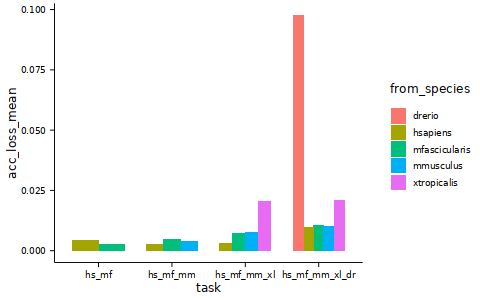

In [251]:
options(repr.plot.width= 4, repr.plot.height = 2.5)

acc_loss %>% select(task, integration_method_intg, homology_method_intg, acc_loss, from_species) %>% unique() %>% arrange(task, acc_loss) %>% 
filter(integration_method_intg == 'scVI') %>% filter(homology_method_intg == 'one2one only') %>% 
group_by(task, from_species) %>% mutate(acc_loss_mean = mean(c(acc_loss))) %>% 
select(task, from_species, acc_loss_mean) %>% unique() %>% 
ggplot(aes(x = task, y = acc_loss_mean, fill = from_species)) + geom_bar(stat = 'identity', position = 'dodge', width = 0.7) + common_0x 

In [252]:
pdf("acc_loss_heart_gradually_add.pdf", height = 1.5, width = 2)

options(repr.plot.width= 4, repr.plot.height = 2.5)

acc_loss %>% select(task, integration_method_intg, homology_method_intg, acc_loss, from_species) %>% unique() %>% arrange(task, acc_loss) %>% 
filter(integration_method_intg == 'scVI') %>% filter(homology_method_intg == 'one2one only') %>% 
group_by(task, from_species) %>% mutate(acc_loss_mean = mean(c(acc_loss))) %>% 
select(task, from_species, acc_loss_mean) %>% unique() %>% 
ggplot(aes(x = task, y = acc_loss_mean, fill = from_species)) + geom_bar(stat = 'identity', position = 'dodge', width = 0.8) + common_0x 

dev.off()

png 
  2

## merge acc_loss and bio metrics

In [ ]:
bio_scores = bio_dd  %>% 
select(task, integration_method, homology_method, type, bio_score) %>% ungroup() %>% group_by(task) %>% 
mutate(bio_score_scaled = (bio_score - min(bio_score)) / (max(bio_score) - min(bio_score)))

In [ ]:
merge(batch_scores, bio_scores, by = c("task", "type")) %>% 
mutate(score_overall = 0.6*bio_score_scaled + 0.4*avg_score_scaled) %>% group_by(type) %>% mutate(score_overall_task_avg = mean(c(score_overall))) %>% 
select(type, score_overall_task_avg) %>% unique() %>% 
arrange(desc(score_overall_task_avg))

type,score_overall_task_avg
<chr>,<dbl>
scVI one2one only,0.8984528
scVI stronger homology,0.8821366
scVI higher expression,0.8779889
seuratCCA higher expression,0.8520848
seuratCCA stronger homology,0.8491119
seuratCCA one2one only,0.8483868
seuratRPCA higher expression,0.7884989
seuratRPCA stronger homology,0.7852550
seuratRPCA one2one only,0.7845709


In [ ]:
bio_dd %>% write_csv("gradually_add_species_bio.csv")